In [27]:
import pandas as pd
import numpy as np
from datetime import datetime

In [49]:
df=pd.read_csv('sphist.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date', ascending=True)

In [50]:
# Generate the average price for last 5, 30, 365 days, 
# ratio of 5/365, std of 5, std of 365, ratio std5/std365

df['day_5']=df['Close'].rolling(5).mean().shift(1)
df['day_365']=df['Close'].rolling(365).mean().shift(1)
df['day_30']=df['Close'].rolling(30).mean().shift(1)
df['ratio_p/y']=df['day_5']/df['day_365']
df['std_5']=df['Close'].rolling(5).std().shift(1)
df['std_365']=df['Close'].rolling(365).std().shift(1)
df['std_ratio']=df['std_5']/df['std_365']

In [15]:
df.Date.head(5)

16589   1950-01-03
16588   1950-01-04
16587   1950-01-05
16586   1950-01-06
16585   1950-01-09
Name: Date, dtype: datetime64[ns]

In [55]:
# Select dates after 1951-01-02
df=df[df["Date"] > datetime(year=1951, month=1, day=2)].dropna(axis=0)
# Separate train and test on 2013/01/01
train=df[df['Date']< datetime(year=2013, month=1, day=1)]
test=df[df['Date']> datetime(year=2012, month=12, day=31)]

In [25]:
# Define error metric: Mean Absolute Error:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

target=train['Close']
features=['day_5','day_365','ratio_p/y','std_ratio']

model=LinearRegression()
model.fit(train[features],target)

predictions=model.predict(test[features])
mae=mean_absolute_error(predictions,test['Close'])

In [26]:
mae

16.100016089622006

### Train some other indicators:
* The average volume over the past five days.
* The average volume over the past year.
* The ratio between the average volume for the past five days, and the average volume for the past year.
* The standard deviation of the average volume over the past five days.
* The standard deviation of the average volume over the past year.
* The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
* The ratio between the lowest price in the past year and the current price.
* The ratio between the highest price in the past year and the current price.
* The year component of the date.
* The month component of the date.
* The day of week.
* The day component of the date.
* The number of holidays in the prior month.


In [51]:
# Three more indicators with Volume
df['vol_5']=df['Volume'].rolling(5).mean().shift(1)
df['vol_365']=df['Volume'].rolling(365).mean().shift(1)
df['vol_ratio']=df['vol_5']/df['vol_365']



In [52]:
df['Year']=df['Date'].dt.year
# Ratio between lowest value of last year and current price
lowest_yr=[]
for index, row in df.iterrows():   
    lastyr=row['Year']-1
    lowest=df[df['Year']==lastyr]['Close'].min()
    lowest_yr.append(lowest)


In [53]:
df['lowest']=lowest_yr
df['last_low_ratio']=df['Close']/df['lowest']

### Train the model with new indicators:

In [54]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'day_5',
       'day_365', 'day_30', 'ratio_p/y', 'std_5', 'std_365', 'std_ratio',
       'vol_5', 'vol_365', 'vol_ratio', 'Year', 'lowest', 'last_low_ratio'],
      dtype='object')

In [57]:
# Define error metric: Mean Absolute Error:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

target=train['Close']
features=['day_5','day_365','ratio_p/y','std_ratio','vol_5','vol_ratio','day_30']

model=LinearRegression()
model.fit(train[features],target)

predictions=model.predict(test[features])
mae=mean_absolute_error(predictions,test['Close'])
print(mae)

16.1426067081


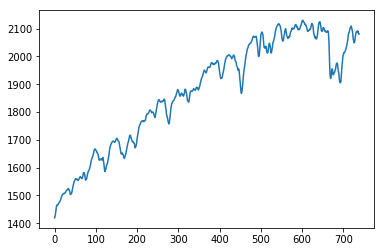

In [58]:
plt.plot(predictions)

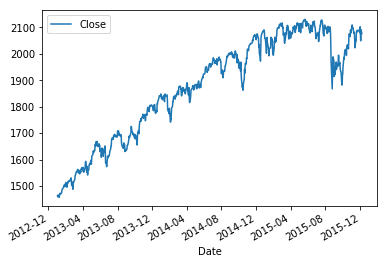

In [62]:
test.plot(x='Date',y='Close')

In [68]:
# Create a new dataframe.
predictions_Series=pd.Series(predictions,index=test.index)
pred_df=pd.DataFrame({'predictions':predictions_Series,'Date':test.Date})

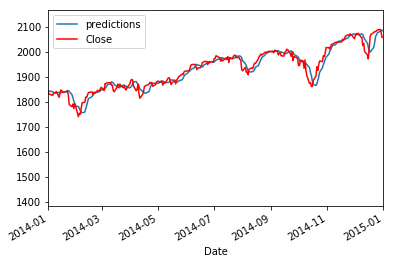

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline



ax1=pred_df.plot(x='Date',y='predictions')
test.plot(x='Date',y='Close',color='red',ax=ax1)
#plt.xlim(['2014','2015'])
plt.show()

### Future steps
* Find better indicators
* Reconstruct the algorithm and use data from other sources
* Try other techniques, like a random forest, and see if they perform better.
* You can also incorporate outside data, such as the weather in New York City (where most trading happens) the day before, and the amount of Twitter activity around certain stocks.
* You can also make the system real-time by writing an automated script to download the latest data when the market closes, and make predictions for the next day.
* you can make the system "higher-resolution". You're currently making daily predictions, but you could make hourly, minute-by-minute, or second by second predictions. This will require obtaining more data, though. You could also make predictions for individual stocks instead of the S&P500.

